# Telco Churn Analysis

## Setup

In [1]:
# Set up environment
%matplotlib inline
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Read in our data
customer_churn = pd.read_csv("Telco-Customer-Churn.csv")


In [2]:
# Get to know the data a bit

customer_churn.info()
customer_churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Let's clean the data. The first thing I notice is the column 'TotalCharges' is not numeric.

customer_churn['TotalCharges'] = pd.to_numeric(customer_churn['TotalCharges'], errors='coerce')

In [4]:
# Now we will check for null values in cols of interest.
print(customer_churn['SeniorCitizen'].isnull().values.any())
print(customer_churn['MonthlyCharges'].isnull().values.any())
print(customer_churn['TotalCharges'].isnull().values.any())


False
False
True


In [5]:
# Check how many nulls are in TotalCharges. If a small amount, we should be fine just dropping them.

customer_churn['TotalCharges'].isnull().sum()

11

In [6]:
# Only 11. Let's drop them.

customer_churn['TotalCharges'].dropna(inplace=True)

In [7]:
# Now we can split our dataset into two: those who churned and those who did not

churn_yes = customer_churn[(customer_churn['Churn'] == 'Yes')]
churn_yes.info()

churn_no = customer_churn[(customer_churn['Churn'] == 'No')]
churn_no.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1869 non-null   object 
 1   gender            1869 non-null   object 
 2   SeniorCitizen     1869 non-null   int64  
 3   Partner           1869 non-null   object 
 4   Dependents        1869 non-null   object 
 5   tenure            1869 non-null   int64  
 6   PhoneService      1869 non-null   object 
 7   MultipleLines     1869 non-null   object 
 8   InternetService   1869 non-null   object 
 9   OnlineSecurity    1869 non-null   object 
 10  OnlineBackup      1869 non-null   object 
 11  DeviceProtection  1869 non-null   object 
 12  TechSupport       1869 non-null   object 
 13  StreamingTV       1869 non-null   object 
 14  StreamingMovies   1869 non-null   object 
 15  Contract          1869 non-null   object 
 16  PaperlessBilling  1869 non-null   object 


## Analysis

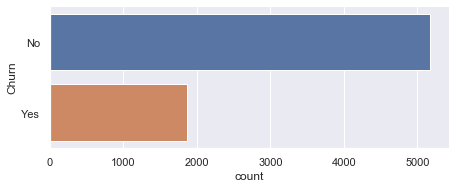

In [8]:
ax = sns.catplot(y="Churn", kind="count", data=customer_churn, height=2.6, aspect=2.5, orient='h')

In [9]:
# We can see that out of 7043 customers, 1869 of them churned. This makes the overall churn rate:

print(str(round(((1869 / 7043) * 100),2)) + "%")

26.54%


### Now let's move on to columns of interest

We will start with monthly charges. Are customers with higher monthly charges on average more likely to churn?

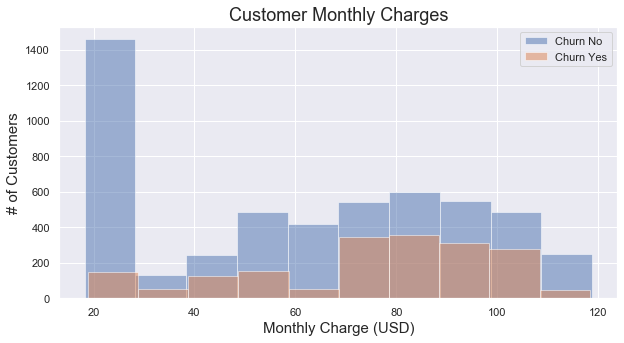

In [123]:
# visualize monthly charges to check for normality
plt.figure(figsize=(10,5))
plt.hist(churn_no['MonthlyCharges'], alpha = .5, label = 'Churn No')
plt.hist(churn_yes['MonthlyCharges'], alpha = .5, label = 'Churn Yes')
plt.title('Customer Monthly Charges', fontsize=18)
plt.xlabel('Monthly Charge (USD)', fontsize=15)
plt.ylabel('# of Customers', fontsize=15)
plt.legend()
plt.show()

In [12]:
# The data does not appear to be normal. Let's run some stats to confirm this.
print(stats.describe(churn_yes['MonthlyCharges']))
print(stats.describe(churn_no['MonthlyCharges']))

DescribeResult(nobs=1869, minmax=(18.85, 118.35), mean=74.44133226324237, variance=608.4141833954307, skewness=-0.7287883064780541, kurtosis=-0.36375819567133183)
DescribeResult(nobs=5174, minmax=(18.25, 118.75), mean=61.26512369540008, variance=966.7527670734264, skewness=-0.025012288702718842, kurtosis=-1.3551511690013145)


In [13]:
# With both datasets showing a kurtosis and skewness between -3 and 3, the data is normal enough to perform a t-test!
stats.ttest_ind(churn_yes['MonthlyCharges'], churn_no['MonthlyCharges'])

Ttest_indResult(statistic=16.53673801593631, pvalue=2.706645606888261e-60)

 We can reject the null from either of these results:
 1. The test statistic is greater than 1.96
 2. The p-value is less than < .05
 
 In our case, both are true.

##### From this we can say "There is a .001% chance of observing a difference as large as what is observed even if the two population means are identical"



In [15]:
# To complete our analysis we define a function to compute a 95% confidence interval

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(churn_yes['MonthlyCharges'], churn_no['MonthlyCharges'])

'The difference in means at the 95% confidence interval (two-tail) is between -14.579187319249597 and -11.773229816435206.'

### We can interpret this result as saying that with 95% confidence, customers who did not churn have monthly payments on average between 14.58 and 11.77 dollars cheaper than those who did churn. 

Let's move onto tenure. 

In [90]:
short_tenure = customer_churn.loc[customer_churn['tenure'] < 12]
long_tenure = customer_churn.loc[customer_churn['tenure'] >= 12]

In [91]:
short_tenure['Churn'].value_counts()

No     1070
Yes     999
Name: Churn, dtype: int64

In [92]:
long_tenure['Churn'].value_counts()

No     4104
Yes     870
Name: Churn, dtype: int64

In [81]:
# pie chart 
# plt.set_title('Churn Based on Tenure')
plt.figure(figsize=(18,5))
labels = 'Yes', 'No'
plt.subplot(1, 2, 1)
plt.pie(short_tenure['Churn'].value_counts(), labels={'Yes', 'No'}, autopct='%1.1f%%')
plt.subplot(1, 2, 2)
plt.pie(long_tenure['Churn'].value_counts(), labels={'Yes', 'No'}, autopct='%1.1f%%')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

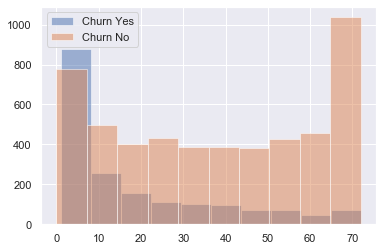

In [93]:

plt.hist(churn_yes['tenure'], alpha = .5, label = 'Churn Yes')
plt.hist(churn_no['tenure'], alpha = .5, label = 'Churn No')
plt.legend()
plt.show()

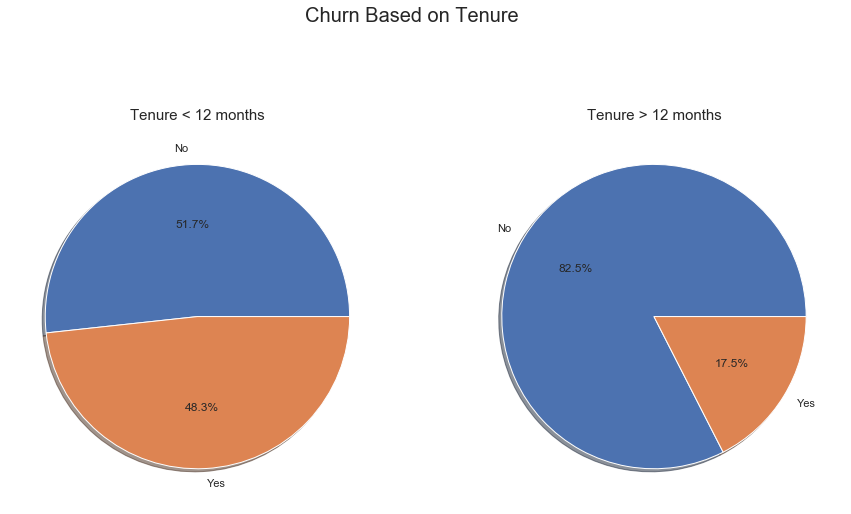

In [115]:
# pie chart 

fig, axs = plt.subplots(1, 2, figsize=(15,9))
axs[0].pie(short_tenure['Churn'].value_counts(), labels={'Yes', 'No'}, autopct='%1.1f%%', shadow=True)
axs[0].set_title('Tenure < 12 months', fontsize=15)
fig.suptitle('Churn Based on Tenure', fontsize=20)
axs[1].pie(long_tenure['Churn'].value_counts(), labels={'Yes', 'No'}, autopct='%1.1f%%', shadow=True)
axs[1].set_title('Tenure > 12 months', fontsize=15)
plt.show()

In [20]:
# Run ttest and confidence interval
print(stats.ttest_ind(churn_yes['tenure'], churn_no['tenure']))
get_95_ci(churn_yes['tenure'], churn_no['tenure'])

Ttest_indResult(statistic=-31.57955051135377, pvalue=7.99905796059022e-205)


'The difference in means at the 95% confidence interval (two-tail) is between 18.488194992572513 and 20.693468976116467.'

In [19]:
# Check to see if data is normal enough for t-test
print(stats.describe(churn_yes['tenure']))
print(stats.describe(churn_no['tenure']))

DescribeResult(nobs=1869, minmax=(1, 72), mean=17.979133226324237, variance=381.46476777078516, skewness=1.148357706697273, kurtosis=0.19251668589696225)
DescribeResult(nobs=5174, minmax=(0, 72), mean=37.56996521066873, variance=581.4742262891432, skewness=-0.031710670359456336, kurtosis=-1.4135656769268594)


### With 95% confidence, customers who did not churn had a tenure that, on average, was between 18.49 and 20.70 months longer than those who did churn.

Lastly we will look at Senior Citizen status.

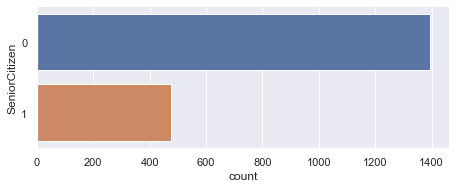

In [21]:
ax = sns.catplot(y="SeniorCitizen", kind="count", data=churn_yes, height=2.6, aspect=2.5, orient='h')

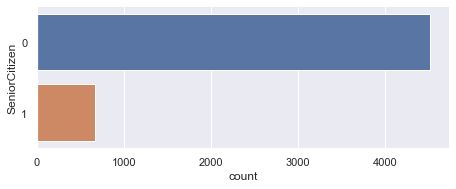

In [22]:
ax = sns.catplot(y="SeniorCitizen", kind="count", data=churn_no, height=2.6, aspect=2.5, orient='h')

Text(0.5, 1.0, 'Senior Citizen Status vs Churn')

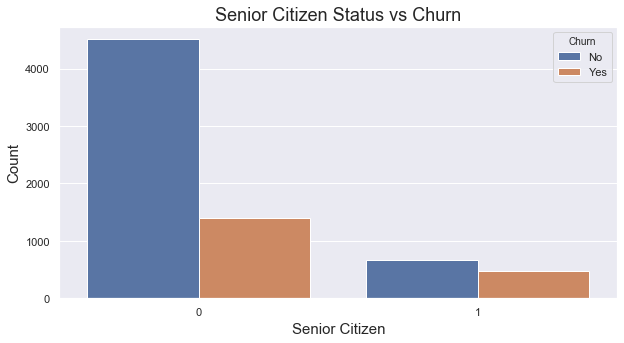

In [129]:

plt.figure(figsize=(10,5))
sns.countplot(x="SeniorCitizen", hue="Churn", data=customer_churn)
plt.xlabel("Senior Citizen", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title('Senior Citizen Status vs Churn', fontsize=18)


More than HALF of senior citizens are churning!


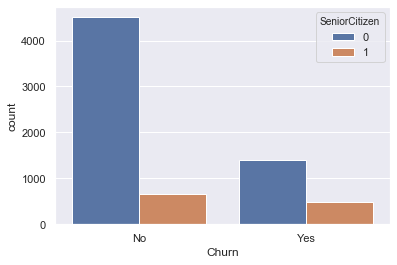

In [24]:
sns.countplot(x="Churn", hue="SeniorCitizen", data=customer_churn)

In [27]:
crosstab = pd.crosstab(customer_churn['Churn'], customer_churn['SeniorCitizen'])
crosstab

SeniorCitizen,0,1
Churn,,
No,4508,666
Yes,1393,476


In [62]:
#run a chi squared test

stats.chi2_contingency(crosstab)

(159.42630036838742,
 1.510066805092378e-36,
 1,
 array([[4335.05239245,  838.94760755],
        [1565.94760755,  303.05239245]]))

### If this distribution is due entirely to chance, then you have a <.01% chance of finding a discrepancy between the observed and expected distributions that is this extreme. In other words, senior citizen status has a very significant connection to churn


## Conclusions

In review, we found that customers who churn have higher monthly charges, lower tenure, and typically hold senior citizen status.

Some suggestions to improve these numbers:
1. Promotional deals can lock-in users for a lower price on a contractual baises. This will help to not only alleviate the higher monthly charges, but also increase customers' tenure. 

2. A loyalty program could also be implemented, pushing customers into a longer tenure, reducing the possibility that they churn.

3. A senior discount could be beneficial to help reign in their outrageous rates of churn. It would also be worth exploring a simplified UI or UX tailored toward the elderly